# MACHINE LEARNING: Battletime

Welcome to me. I'm going to redo all assignments given in Machine Learning Courses by using Numpy, Octave, Tensorflow and Keras. <br>
Make comparisons to all the results and performances between them.

Let's get started!

## What is Machine Learning?

#### Machine Learning: 
a field of study that gives computers the ability to learn without being explicitly programmed. <br>
by Arthur Samuel (1959). 

## Alogorithms
1. Supervised learning (given results)
   <ul>
    <li>Linear Regression</li>
    <li>Logistic Regression</li>
    <li>Neural Network</li>
    <li>Backpropagation</li>
    <li>SVM: Support Vector Machines</li>
   </ul> 

2. Unsupervised learning (not given results)
   <ul>
    <li>Anomaly Detection</li>
    <li>PCA: Principle Component Analysi</li>
    <li>K-means</li>
   </ul>

# Linear Regression

Cost function:
Find the minimum error between prediction and real value (y) using hypothesis function

Steps <br>
(0.) Prepare data X, Y in normalized each feature, perform dimention reduction
1. Plot data X and Y to see how data scatters
2. Initialize $\theta$ to zero <br>
\begin{align}
\theta = \begin{bmatrix}
             \theta_0 & \theta_1 & \theta_2 & ... & \theta_n           
         \end{bmatrix} \\
\theta = \begin{bmatrix}
             0 & 0 & 0 & ... & 0           
         \end{bmatrix}
\end{align}

3. Define hypothesis function using linear function, square function etc. <br>
depends on how data in a graph looks like
\begin{equation}
h_\theta(X) = \theta_0 + \theta_1X 
\end{equation}

4. Define cost function and pick up a good learning rate
\begin{equation}
J = \frac{1}{2m}\sum\limits_{i=1}^m (h_\theta(x^i)-y^i)^{2} 
\end{equation}

5. Find theta that give minimum cost function J <br>
Keep changing $\theta$ to give us min J <br>
But we won't change $\theta$ randomly, we'll change them into the right direction. <br><br>
<b>Gradient Descent:</b> go down little by little, simultaneous update $\theta$ <br>
Derevatives of cost function is a slope <br>
so we move a point to a lower point by decreasing $\theta$ with a slope <br>
if we want to move faster, multiply the slope value with a number called learning rate $\alpha$ <br>
repeat this until covergence, pick the proper number of iterations
\begin{equation}
\theta_0 := \theta_0 - \alpha\frac{\partial}{\partial\theta}J(\theta_0, \theta_1) \\
\theta_1 := \theta_1 - \alpha\frac{\partial}{\partial\theta}J(\theta_0, \theta_1)
\end{equation}
<b>Normal Equation:</b> solve the parameter $\theta$ directly from the equation <br>

6. Predict y by using the theta computed from step 4
7. Test accuracy and F-score, benchmark

###Hyperparameters
<ul>
    <li>Function: linear, polynomial, square, oval</li>
    <li>Learning rate: 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10</li>
    <li>Number of iterations: 100-10,000</li>
    <li>Lambda for regularization: 10-10,000 (Make unsignificant theta close to 0)</li>
</ul>

In [22]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Step 0: Data preparation, mini example see how data looks like
def normalize(data):
    return (data - np.mean(data))/np.std(data)

n = 1000
x1 = x2 = np.linspace(1, 10, n, endpoint=True)
x1 = normalize(x1)
x2 = normalize(x2)
X = np.array((x1, x2)).T.reshape(n, 2)
print('X: ',X)

Y = (x1 + x2).reshape(n, 1)
Y = normalize(Y)
print('Y: ',Y)

('X: ', array([[-1.73031962, -1.73031962],
       [-1.72685552, -1.72685552],
       [-1.72339142, -1.72339142],
       ..., 
       [ 1.72339142,  1.72339142],
       [ 1.72685552,  1.72685552],
       [ 1.73031962,  1.73031962]]))
('Y: ', array([[-1.73031962],
       [-1.72685552],
       [-1.72339142],
       [-1.71992731],
       [-1.71646321],
       [-1.71299911],
       [-1.709535  ],
       [-1.7060709 ],
       [-1.7026068 ],
       [-1.69914269],
       [-1.69567859],
       [-1.69221449],
       [-1.68875038],
       [-1.68528628],
       [-1.68182218],
       [-1.67835807],
       [-1.67489397],
       [-1.67142987],
       [-1.66796576],
       [-1.66450166],
       [-1.66103755],
       [-1.65757345],
       [-1.65410935],
       [-1.65064524],
       [-1.64718114],
       [-1.64371704],
       [-1.64025293],
       [-1.63678883],
       [-1.63332473],
       [-1.62986062],
       [-1.62639652],
       [-1.62293242],
       [-1.61946831],
       [-1.61600421],
       [-1.

<IPython.core.display.Javascript object>


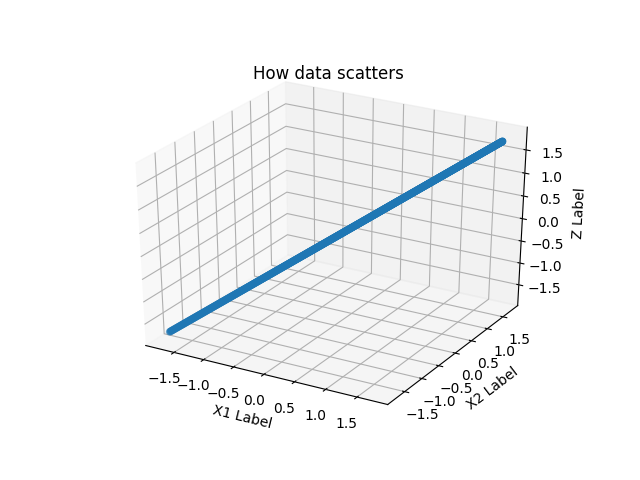

In [23]:
# Step 1: plot data see how data looks like
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('How data scatters')
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Z Label')

ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [24]:
# Step 2: Initial theta
# from the previous graph we can see that the hypothesis will be a liner function
# so we create 2 theta
def initial_theta():
    theta = np.zeros((3,1))
    return theta

theta = initial_theta()
print(theta)

[[ 0.]
 [ 0.]
 [ 0.]]


In [25]:
# Add bias value for linear function X0 = 0
X0 = np.zeros((n,1))
X = np.concatenate((X0, X), axis=1)
print(X)

[[ 0.         -1.73031962 -1.73031962]
 [ 0.         -1.72685552 -1.72685552]
 [ 0.         -1.72339142 -1.72339142]
 ..., 
 [ 0.          1.72339142  1.72339142]
 [ 0.          1.72685552  1.72685552]
 [ 0.          1.73031962  1.73031962]]


In [15]:
# Step 3: Define hypothesis function using linear function
def compute_h(theta, X):
    h = np.matmul(X, theta)
    return h

compute_h(theta, X)

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
      

In [26]:
# Step 3: Compute cost function with regularization
def compute_cost(theta, X, Y, lambda_reg=10):
    m = len(Y)
    J = 1.0/(2*m)*(np.sum(np.square(compute_h(theta, X) - Y)) + lambda_reg*np.sum(np.square(theta)))
    return J

compute_cost(theta, X, Y)

0.50000000000000011

In [27]:
# Step 4: Using Gradient Descent, find theta that give minimum cost function J
def grad(theta, X, Y, num_iter=1000, learning_rate=0.001, lambda_reg=100):
    m = len(Y)
    theta = initial_theta()
    Theta = np.zeros((num_iter, theta.shape[0]))
    J = np.zeros((num_iter, 1))
    
    for i in range(num_iter):
        theta = theta - learning_rate/m*(np.matmul(X.T, (compute_h(theta, X) - Y)) + lambda_reg/m*theta)
        Theta[i] = theta.reshape(theta.shape[0])
        J[i] = compute_cost(theta, X, Y)
        print(i, J[i], theta.flatten())
    return theta, Theta, J

num_iter = 2000
learning_rate = 0.001
theta, Theta, J = grad(theta, X, Y, num_iter, learning_rate)
print('Theta: ', theta)

(0, array([ 0.49800201]), array([ 0.   ,  0.001,  0.001]))
(1, array([ 0.49601202]), array([ 0.      ,  0.001998,  0.001998]))
(2, array([ 0.49403001]), array([ 0.      ,  0.002994,  0.002994]))
(3, array([ 0.49205594]), array([ 0.        ,  0.00398802,  0.00398802]))
(4, array([ 0.49008977]), array([ 0.        ,  0.00498004,  0.00498004]))
(5, array([ 0.48813148]), array([ 0.        ,  0.00597008,  0.00597008]))
(6, array([ 0.48618104]), array([ 0.        ,  0.00695814,  0.00695814]))
(7, array([ 0.48423841]), array([ 0.        ,  0.00794422,  0.00794422]))
(8, array([ 0.48230356]), array([ 0.        ,  0.00892833,  0.00892833]))
(9, array([ 0.48037646]), array([ 0.        ,  0.00991048,  0.00991048]))
(10, array([ 0.47845708]), array([ 0.        ,  0.01089066,  0.01089066]))
(11, array([ 0.4765454]), array([ 0.        ,  0.01186888,  0.01186888]))
(12, array([ 0.47464137]), array([ 0.        ,  0.01284514,  0.01284514]))
(13, array([ 0.47274497]), array([ 0.        ,  0.01381945,  0.

(420, array([ 0.09346948]), array([ 0.        ,  0.28475757,  0.28475757]))
(421, array([ 0.09310167]), array([ 0.        ,  0.28518805,  0.28518805]))
(422, array([ 0.09273533]), array([ 0.        ,  0.28561768,  0.28561768]))
(423, array([ 0.09237047]), array([ 0.        ,  0.28604644,  0.28604644]))
(424, array([ 0.09200708]), array([ 0.        ,  0.28647435,  0.28647435]))
(425, array([ 0.09164515]), array([ 0.       ,  0.2869014,  0.2869014]))
(426, array([ 0.09128467]), array([ 0.       ,  0.2873276,  0.2873276]))
(427, array([ 0.09092564]), array([ 0.        ,  0.28775294,  0.28775294]))
(428, array([ 0.09056806]), array([ 0.        ,  0.28817744,  0.28817744]))
(429, array([ 0.09021191]), array([ 0.        ,  0.28860108,  0.28860108]))
(430, array([ 0.08985719]), array([ 0.        ,  0.28902388,  0.28902388]))
(431, array([ 0.0895039]), array([ 0.        ,  0.28944583,  0.28944583]))
(432, array([ 0.08915203]), array([ 0.        ,  0.28986694,  0.28986694]))
(433, array([ 0.088

(836, array([ 0.01917015]), array([ 0.        ,  0.40640922,  0.40640922]))
(837, array([ 0.01910167]), array([ 0.       ,  0.4065964,  0.4065964]))
(838, array([ 0.01903347]), array([ 0.        ,  0.40678321,  0.40678321]))
(839, array([ 0.01896554]), array([ 0.        ,  0.40696964,  0.40696964]))
(840, array([ 0.01889788]), array([ 0.       ,  0.4071557,  0.4071557]))
(841, array([ 0.01883051]), array([ 0.        ,  0.40734139,  0.40734139]))
(842, array([ 0.0187634]), array([ 0.        ,  0.40752671,  0.40752671]))
(843, array([ 0.01869656]), array([ 0.        ,  0.40771166,  0.40771166]))
(844, array([ 0.01863]), array([ 0.        ,  0.40789623,  0.40789623]))
(845, array([ 0.01856371]), array([ 0.        ,  0.40808044,  0.40808044]))
(846, array([ 0.01849768]), array([ 0.        ,  0.40826428,  0.40826428]))
(847, array([ 0.01843192]), array([ 0.        ,  0.40844775,  0.40844775]))
(848, array([ 0.01836643]), array([ 0.        ,  0.40863086,  0.40863086]))
(849, array([ 0.018301

(1241, array([ 0.00556256]), array([ 0.        ,  0.45839914,  0.45839914]))
(1242, array([ 0.00554949]), array([ 0.        ,  0.45848234,  0.45848234]))
(1243, array([ 0.00553648]), array([ 0.        ,  0.45856538,  0.45856538]))
(1244, array([ 0.00552352]), array([ 0.        ,  0.45864825,  0.45864825]))
(1245, array([ 0.00551061]), array([ 0.        ,  0.45873095,  0.45873095]))
(1246, array([ 0.00549776]), array([ 0.        ,  0.45881349,  0.45881349]))
(1247, array([ 0.00548495]), array([ 0.        ,  0.45889586,  0.45889586]))
(1248, array([ 0.00547221]), array([ 0.        ,  0.45897807,  0.45897807]))
(1249, array([ 0.00545951]), array([ 0.        ,  0.45906012,  0.45906012]))
(1250, array([ 0.00544687]), array([ 0.      ,  0.459142,  0.459142]))
(1251, array([ 0.00543428]), array([ 0.        ,  0.45922371,  0.45922371]))
(1252, array([ 0.00542174]), array([ 0.        ,  0.45930526,  0.45930526]))
(1253, array([ 0.00540925]), array([ 0.        ,  0.45938665,  0.45938665]))
(1254

(1613, array([ 0.00308683]), array([ 0.        ,  0.48024561,  0.48024561]))
(1614, array([ 0.00308409]), array([ 0.        ,  0.48028512,  0.48028512]))
(1615, array([ 0.00308136]), array([ 0.        ,  0.48032455,  0.48032455]))
(1616, array([ 0.00307865]), array([ 0.       ,  0.4803639,  0.4803639]))
(1617, array([ 0.00307594]), array([ 0.        ,  0.48040317,  0.48040317]))
(1618, array([ 0.00307325]), array([ 0.        ,  0.48044236,  0.48044236]))
(1619, array([ 0.00307057]), array([ 0.        ,  0.48048148,  0.48048148]))
(1620, array([ 0.0030679]), array([ 0.        ,  0.48052052,  0.48052052]))
(1621, array([ 0.00306524]), array([ 0.        ,  0.48055948,  0.48055948]))
(1622, array([ 0.0030626]), array([ 0.        ,  0.48059836,  0.48059836]))
(1623, array([ 0.00305996]), array([ 0.        ,  0.48063716,  0.48063716]))
(1624, array([ 0.00305734]), array([ 0.        ,  0.48067589,  0.48067589]))
(1625, array([ 0.00305472]), array([ 0.        ,  0.48071453,  0.48071453]))
(162

<IPython.core.display.Javascript object>


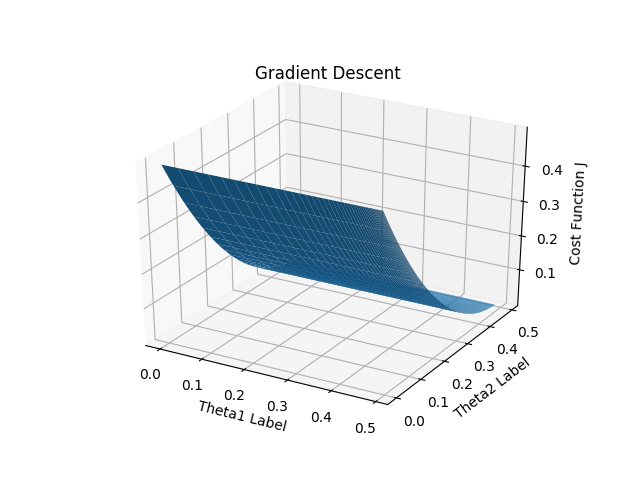

In [28]:
# Plot theta and cost function J to see if they're really convergence

fig = plt.figure()
theta1, theta2 = np.meshgrid(Theta[:,1], Theta[:,2])

ax = fig.gca(projection='3d')
ax.set_title('Gradient Descent')
ax.set_xlabel('Theta1 Label')
ax.set_ylabel('Theta2 Label')
ax.set_zlabel('Cost Function J')
ax.plot_surface(theta1, theta2, J)
fig.show()


In [29]:
# Step 4: Using Normal Equation, find theta that give minimum cost function J

<IPython.core.display.Javascript object>


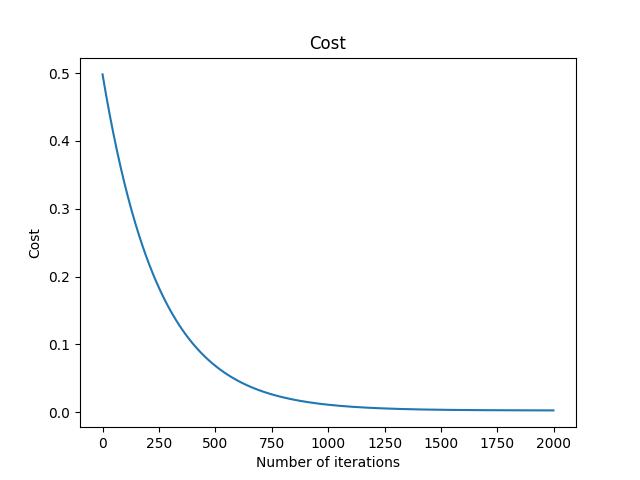

In [30]:
# Diagnosis Plot graph to find the proper variable for num_iter and learning_rate
fig2 = plt.figure()
plt.plot(range(num_iter), J)
plt.title('Cost')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
fig2.show()

In [32]:
# Step 6: Predict y test if x = [11, 11], expected y = 22, expected theta is [0, 0.5, 0.5]
x_test = np.array([11, 11])
x_test = (x_test - np.mean(X))/np.std(X)
x_test = np.concatenate(([0], x_test))
print(x_test)

print(theta)

predicted_y = (compute_h(theta, x_test) * np.std(Y)) + np.mean(Y)
print(predicted_y)

[  0.          13.47219359  13.47219359]
[[ 0.        ]
 [ 0.49087879]
 [ 0.49087879]]
[ 13.2264281]


In [ ]:
# Test accuracy and F-score, benchmark

In [35]:
# Try Octave

In [36]:
# Try Tensorflow

In [37]:
# Try Keras

In [ ]:
# Compare libraries


In [34]:
# Try real data
